In [3]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read the csv file
titanic = pd.read_csv('titanic_train.csv')
titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h1 style="color:Navy">1. EXPLORE THE DATA</h1>
<ol>
    Exploring the dataset helps us understand our data and give us an insight into what we variables we will be working with in the course of our analysis
    
</ol>


In [5]:
#to get the statistical details of the numerical data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#a concise summary of the dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#to get the number of rows and columns in the dataset
titanic.shape

(891, 12)

In [8]:
#the total number of elements in the dataframe
titanic.size

10692

In [132]:
#the dimension of the dataframe.
titanic.ndim

2

In [133]:
#sum of null values in the Dataframe
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [134]:
#sum of duplicated values in the dataframe
titanic.duplicated().sum()

0

In [39]:
#dropping null values from rows belonging Age and Embraked columns

titanic.dropna(how = 'any', subset = ['Age', 'Embarked'], inplace = True)
titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [140]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39,0,5,382652,29.125,Unspecified,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.000,Unspecified,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.750,Unspecified,Q


In [152]:
#filled null values in Cabin column with unspecified rather than dropping them 
#because the sum of the null values are significantly high.

titanic['Cabin'].fillna('Unspecified', inplace = True)
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Unspecified,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C


In [150]:
#to understand the kind of people that were onboard
titanic['Age'].unique()

array([22, 38, 26, 35, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15, 28,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

In [153]:
#to know how old the oldest person onboard was
titanic['Age'].max()

80

In [154]:
#to know how old the youngest person onboard was
titanic['Age'].min()

0

In [155]:
#convert Age from float to integer in preparation for visualiztion and machine learning operation
titanic['Age'] = titanic['Age'].astype(int)
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int32
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\USER\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


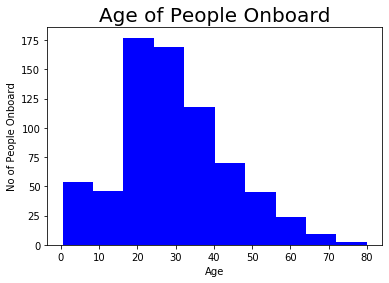

In [10]:
#a histogram showing the classification of the age of people onboard 
plt.hist(titanic['Age'], color = 'blue')
plt.title('Age of People Onboard', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('No of People Onboard')
plt.show()

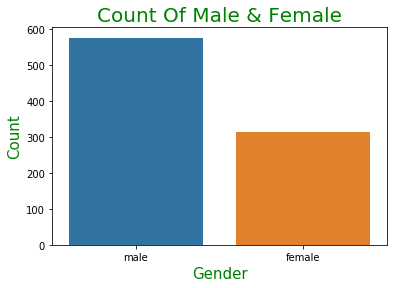

male      577
female    314
Name: Sex, dtype: int64


In [11]:
#a countplot showing the count of people onboard by gender(sex)
sns.countplot(x='Sex',data=titanic)
plt.title("Count Of Male & Female",fontsize=20,color='green')
plt.xlabel("Gender",fontsize=15,color='green')
plt.ylabel("Count",fontsize=15,color='green')
plt.show()
print(titanic["Sex"].value_counts())

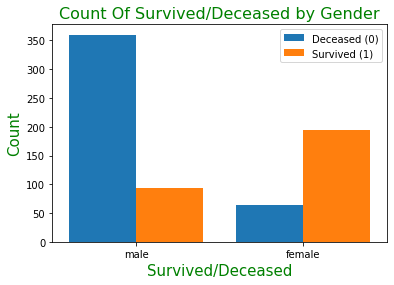

In [188]:
#countplot showing the people who survived by gender
sns.countplot(x='Sex', data=titanic, hue='Survived', saturation = 1)
plt.title("Count Of Survived/Deceased by Gender",fontsize=16,color='green')
plt.xlabel("Survived/Deceased",fontsize=15,color='green')
plt.ylabel("Count",fontsize=15,color='green')
plt.legend(labels=["Deceased (0)","Survived (1)"])
plt.show()

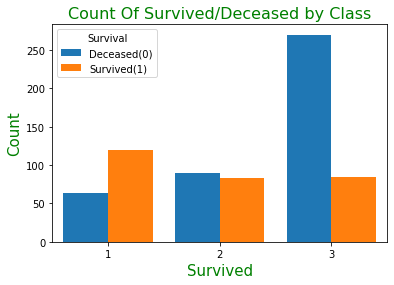

In [198]:
#a count plot showing the number of survival by class
sns.countplot(x='Pclass',data=titanic,hue='Survived', saturation = 1)
plt.title("Count Of Survived/Deceased by Class",fontsize=16,color='green')
plt.xlabel("Survived",fontsize=15,color='green')
plt.ylabel("Count",fontsize=15,color='green')
plt.legend(title= 'Survival', labels = ['Deceased(0)', 'Survived(1)'])
plt.show()

Based on our observation, the Fare column determines the class of all passengers. Class ! tend to have higher fare compared to Class 2 and Class 3 - with class 3 having the lowest fare. 

So basically, we can interpret this to mean that Class 1 had more privilege when it came to how they were assigned seats. While class 3 suffered more illfate because their seat alloaction didnt afford them much chance to survive.

<h1 style="color:Navy">2. BUILD A LOGISTIC REGRESSION MODEL</h2>
<ol>
</ol>


In [204]:
#import necessary library
from sklearn.linear_model import LogisticRegression

<h3 style="color:red">From the data analysis so far we can conclude that we will use following variables as independant variables in our model</h3>
<ol>
    <li>**Pclass**</li>
    <li>**Sex**</li>
    <li>**Age**</li>
    </ol>

In [205]:
titanic.head(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [206]:
#the dataframe for the independent variables - Pclass, Sex and Age
sub_titanic = titanic[['Pclass','Sex','Age']]
sub_titanic

,Pclass,Sex,Age
0,3,male,22
1,1,female,38
2,3,female,26
3,1,female,35
4,3,male,35
...,...,...,...
885,3,female,39
886,2,male,27
887,1,female,19
889,1,male,26


In [207]:
#The Sex column has an all text data which was converted into number in the next line of code
sex_dummies = pd.get_dummies(sub_titanic.Sex, prefix="Sex")
sex_dummies.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [208]:
#merging the dummy variables with the sub dataframe
dummy_with_subtitanic = pd.concat([sub_titanic,sex_dummies],axis='columns')
dummy_with_subtitanic.head()

,Pclass,Sex,Age,Sex_female,Sex_male
0,3,male,22,0,1
1,1,female,38,1,0
2,3,female,26,1,0
3,1,female,35,1,0
4,3,male,35,0,1


In [209]:
#dropping the Sex column from the concatenated dataset to eliminate noise from the dataset.
dummy_with_subtitanic.drop('Sex',axis='columns',inplace=True)
dummy_with_subtitanic.head()

,Pclass,Age,Sex_female,Sex_male
0,3,22,0,1
1,1,38,1,0
2,3,26,1,0
3,1,35,1,0
4,3,35,0,1


In [211]:
#assigned a variable name X to the independent variables
X = dummy_with_subtitanic
X.head()

,Pclass,Age,Sex_female,Sex_male
0,3,22,0,1
1,1,38,1,0
2,3,26,1,0
3,1,35,1,0
4,3,35,0,1


In [210]:
#assigned a name Y to the dependent variable 
y = titanic.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [212]:
#import the train_test_split function from sklearn module
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [112]:
#to fit our model/train our dataset so that the model will take in the argument we are trying to give it(to check for accuracy).
model = LogisticRegression()

In [115]:
model.fit(X_train, y_train)

LogisticRegression()

In [125]:
y_predict = model.predict(X_test)
y_predict

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [126]:
X_test

,Pclass,Age,Sex_female,Sex_male
118,1,24,0,1
320,3,22,0,1
747,2,30,1,0
33,2,66,0,1
103,3,33,0,1
...,...,...,...,...
791,2,16,0,1
37,3,21,0,1
759,1,33,1,0
206,3,32,0,1


Accuracy of the model

In [127]:
model.score(X_test,y_test)

0.7552447552447552

<h1 style="color:Navy">3. BUILD A CLASSIFICATION_REPORT</h1>



In [120]:
from sklearn.metrics import classification_report

In [122]:
report = classification_report
report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [128]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        94
           1       0.66      0.59      0.62        49

    accuracy                           0.76       143
   macro avg       0.73      0.72      0.72       143
weighted avg       0.75      0.76      0.75       143

